<a href="https://colab.research.google.com/github/hamdansyaif/handson-ml2/blob/main/midterm-ml/regresion/midterm_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/drive/MyDrive/midterm_Regresion/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [3]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [4]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


# Load Benar & Rename Kolom

In [5]:
import pandas as pd
import numpy as np

# 1. SETUP PATH
# Pastikan path ini sesuai dengan lokasi file di Google Drive kamu
file_path = '/content/drive/MyDrive/midterm_Regresion/midterm-regresi-dataset.csv'

# 2. LOAD DATA (DENGAN HEADER=NONE)
# Kita pakai header=None karena dataset aslinya tidak punya judul kolom
print("Sedang memuat data... mohon tunggu...")
df = pd.read_csv(file_path, header=None)

# 3. RENAME KOLOM
# Kolom 0 = Year (Target)
# Kolom 1-90 = feature_1 sampai feature_90
column_names = ['Year'] + [f'feature_{i}' for i in range(1, 91)]
df.columns = column_names

# 4. CEK HASIL
print(f"\nShape Data Baru: {df.shape}")
print("\n5 Baris Pertama (Setelah Rename):")
print(df.head())

# Cek info sekilas untuk memastikan tipe data (harus float/int semua)
print("\nInfo Data:")
print(df.info())

Sedang memuat data... mohon tunggu...

Shape Data Baru: (515345, 91)

5 Baris Pertama (Setelah Rename):
   Year  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  2001   49.94357   21.47114   73.07750    8.74861  -17.40628  -13.09905   
1  2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
2  2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
3  2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
4  2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   

   feature_7  feature_8  feature_9  ...  feature_81  feature_82  feature_83  \
0  -25.01202  -12.23257    7.83089  ...    13.01620   -54.40548    58.99367   
1    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
2   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
3    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
4  -12.48207   -9.37636   12.63699  ..

Statistik Tahun (Year):
count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: Year, dtype: float64


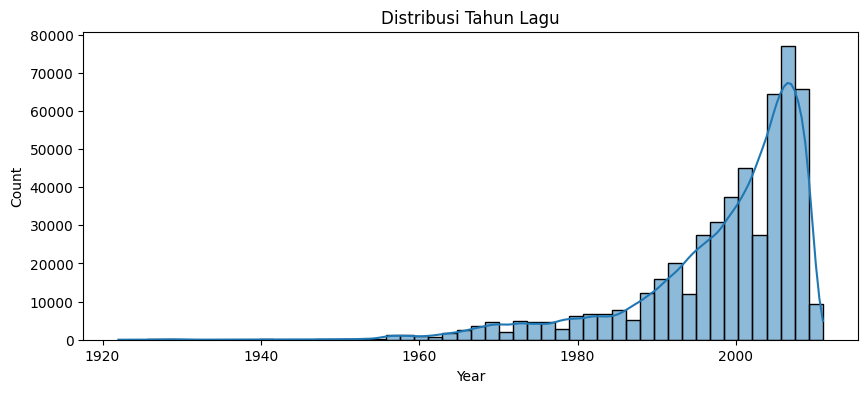


Jumlah Data Train: 412276 baris
Jumlah Data Test : 103069 baris

Sedang menyimpan file clean ke Google Drive...
Sukses! File tersimpan di: /content/drive/MyDrive/midterm_Regresion/train_clean.csv
Sukses! File tersimpan di: /content/drive/MyDrive/midterm_Regresion/test_clean.csv

Contoh Data Train Bersih (Scaled):
   Year  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  2010   0.241717  -1.256565   0.878345   0.220005   0.445762  -0.486189   
1  2001  -0.450799  -2.597516   1.504668   0.396816  -2.551372  -0.078818   
2  2005  -0.089230  -1.233987   0.839382   0.590694   0.795496  -1.199472   

   feature_7  feature_8  feature_9  ...  feature_81  feature_82  feature_83  \
0   0.943110  -0.752325   1.478938  ...   -0.543396   -0.248279    0.368104   
1   1.126415   0.116814  -1.610634  ...    0.515245    1.054412   -0.314095   
2   0.695568  -0.759614  -1.085625  ...    3.566498    0.122273   -0.348646   

   feature_84  feature_85  feature_86  feature_87  feature

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CEK LOGIKA DATA (TAHUN) ---
print("Statistik Tahun (Year):")
print(df['Year'].describe())

# Cek apakah ada tahun 'aneh' (opsional, visualisasi sebaran tahun)
plt.figure(figsize=(10, 4))
sns.histplot(df['Year'], bins=50, kde=True)
plt.title("Distribusi Tahun Lagu")
plt.show()

# --- 2. SPLITTING DATA (80% Train, 20% Test) ---
# Kita pisahkan Target (y) dan Features (X)
X = df.drop('Year', axis=1) # Semua kolom kecuali Year
y = df['Year']              # Hanya kolom Year

# Bagi data: 80% untuk latihan, 20% untuk ujian nanti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nJumlah Data Train: {X_train.shape[0]} baris")
print(f"Jumlah Data Test : {X_test.shape[0]} baris")

# --- 3. SCALING (STANDARD SCALER) ---
# Aturan Emas: FIT hanya di Train, TRANSFORM di Train dan Test
scaler = StandardScaler()

# Pelajari pola data train
scaler.fit(X_train)

# Terapkan pola tersebut ke train dan test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke bentuk DataFrame agar enak dilihat/disimpan
X_train_clean = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_clean = pd.DataFrame(X_test_scaled, columns=X.columns)

# Gabungkan kembali dengan Targetnya agar siap simpan
train_final = pd.concat([y_train.reset_index(drop=True), X_train_clean], axis=1)
test_final = pd.concat([y_test.reset_index(drop=True), X_test_clean], axis=1)

# --- 4. SAVING (CHECKPOINT) ---
# Simpan ke Google Drive agar fase berikutnya tinggal load
save_path_train = '/content/drive/MyDrive/midterm_Regresion/train_clean.csv'
save_path_test = '/content/drive/MyDrive/midterm_Regresion/test_clean.csv'

print("\nSedang menyimpan file clean ke Google Drive...")
train_final.to_csv(save_path_train, index=False)
test_final.to_csv(save_path_test, index=False)

print(f"Sukses! File tersimpan di: {save_path_train}")
print(f"Sukses! File tersimpan di: {save_path_test}")

# Tampilkan data bersih sedikit
print("\nContoh Data Train Bersih (Scaled):")
print(train_final.head(3))

# Machine Learning Track

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import time

# --- 1. LOAD DATA DARI CHECKPOINT ---
print("Sedang meload data bersih...")
train_path = '/content/drive/MyDrive/midterm_Regresion/train_clean.csv'
test_path = '/content/drive/MyDrive/midterm_Regresion/test_clean.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Pisahkan X dan y lagi
X_train = df_train.drop('Year', axis=1)
y_train = df_train['Year']
X_test = df_test.drop('Year', axis=1)
y_test = df_test['Year']

print("Data berhasil diload!")

# --- FUNGSI EVALUASI ---
def evaluasi_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== HASIL EVALUASI: {model_name} ===")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAE  (Mean Absolute Error)    : {mae:.4f}")
    print(f"R2 Score                      : {r2:.4f}")
    return rmse

# --- 2. TRAINING MODEL 1: LINEAR REGRESSION (BASELINE) ---
print("\n[1/2] Sedang training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)
rmse_lr = evaluasi_model("Linear Regression", y_test, y_pred_lr)


# --- 3. TRAINING MODEL 2: XGBOOST (ADVANCED) ---
print("\n[2/2] Sedang training XGBoost (ini mungkin agak lama)...")
# Kita gunakan parameter default yang di-tune sedikit untuk kecepatan (tree_method='hist')
start_time = time.time()

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,     # Jumlah pohon
    learning_rate=0.1,    # Kecepatan belajar
    max_depth=6,          # Kedalaman pohon
    n_jobs=-1,            # Pakai semua core CPU
    tree_method='hist',   # Optimasi untuk data besar (histogram-based)
    random_state=42
)

xgb_model.fit(X_train, y_train)
end_time = time.time()
print(f"Training XGBoost Selesai dalam {(end_time - start_time):.2f} detik")

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = evaluasi_model("XGBoost Regressor", y_test, y_pred_xgb)

# --- KESIMPULAN SEMENTARA ---
print("\n" + "="*30)
if rmse_xgb < rmse_lr:
    print(f"XGBoost MENANG! Error turun sebesar {rmse_lr - rmse_xgb:.4f} point.")
else:
    print("Linear Regression MENANG! (Aneh, biasanya XGBoost lebih bagus)")

Sedang meload data bersih...
Data berhasil diload!

[1/2] Sedang training Linear Regression...

=== HASIL EVALUASI: Linear Regression ===
RMSE (Root Mean Squared Error): 9.5233
MAE  (Mean Absolute Error)    : 6.7782
R2 Score                      : 0.2380

[2/2] Sedang training XGBoost (ini mungkin agak lama)...
Training XGBoost Selesai dalam 29.66 detik

=== HASIL EVALUASI: XGBoost Regressor ===
RMSE (Root Mean Squared Error): 9.0050
MAE  (Mean Absolute Error)    : 6.2985
R2 Score                      : 0.3187

XGBoost MENANG! Error turun sebesar 0.5183 point.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. BANGUN ARSITEKTUR MODEL ---
model = Sequential([
    # Layer 1: Cukup besar untuk menangkap fitur awal
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(), # Menstabilkan training
    Dropout(0.3),         # Mencegah overfitting

    # Layer 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Layer 3
    Dense(64, activation='relu'),

    # Output Layer: 1 Neuron (Tanpa aktivasi / Linear untuk Regresi)
    Dense(1)
])

# --- 2. COMPILE MODEL ---
# Optimizer: Adam (standar industri)
# Loss: MSE (Mean Squared Error)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- 3. SETUP CALLBACKS (PENGAMAN) ---
# EarlyStopping: Stop training kalau validasi error gak turun-turun selama 5 epoch
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# --- 4. MULAI TRAINING ---
print("Mulai Training Deep Learning... (Bisa santai dulu, ini agak lama)")
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # 20% dari train dipakai buat validasi real-time
    epochs=50,            # Maksimal 50 ronde
    batch_size=128,       # Sekali belajar 128 data
    callbacks=[early_stop],
    verbose=1
)

# --- 5. EVALUASI FINAL ---
print("\nEvaluasi Model Deep Learning di Data Test:")
loss, mae = model.evaluate(X_test, y_test)
rmse_dl = loss**0.5 # Akar dari MSE adalah RMSE

print(f"\n=== HASIL EVALUASI: Deep Learning (Neural Net) ===")
print(f"RMSE : {rmse_dl:.4f}")
print(f"MAE  : {mae:.4f}")

# Cek R2 Score manual
from sklearn.metrics import r2_score
y_pred_dl = model.predict(X_test).flatten()
r2_dl = r2_score(y_test, y_pred_dl)
print(f"R2 Score: {r2_dl:.4f}")

# Bandingkan dengan XGBoost tadi
print("\n" + "="*30)
print(f"Skor XGBoost tadi (R2): 0.3187")
print(f"Skor Deep Learning (R2): {r2_dl:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mulai Training Deep Learning... (Bisa santai dulu, ini agak lama)
Epoch 1/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 1337278.8750 - mae: 841.5361 - val_loss: 5144.4312 - val_mae: 65.1441
Epoch 2/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 18323.6602 - mae: 106.6146 - val_loss: 1174.6217 - val_mae: 27.3916
Epoch 3/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 14167.0879 - mae: 94.3458 - val_loss: 879.0405 - val_mae: 19.9179
Epoch 4/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 11101.0234 - mae: 83.7632 - val_loss: 437.1985 - val_mae: 16.8033
Epoch 5/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9783.3535 - mae: 78.7641 - val_loss: 573.5492 - val_mae: 19.6201
Epoch 6/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 8957.6328 - mae: 75.4502 - val_loss: 276.0995 - val_mae: 13.0546
Epoch 7/50
2577/2577 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 8317.2412 - mae: 72.6520 - val_loss: 230.7786 - val_mae: 11.6893
Epoch 8/50
2577/2577 ━━━━━━━

Model Deep Learning berhasil disimpan di: /content/drive/MyDrive/midterm_Regresion/best_model_dl.keras


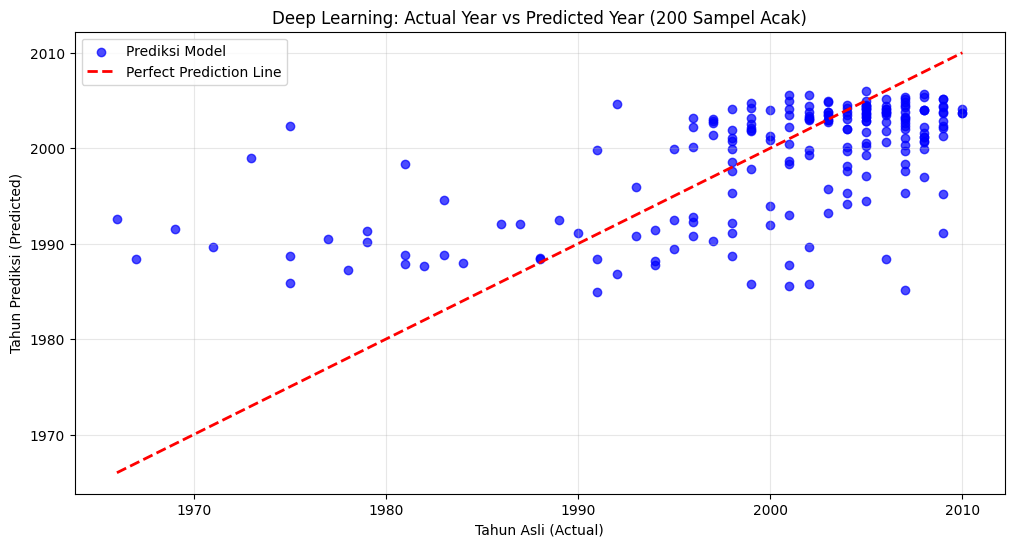

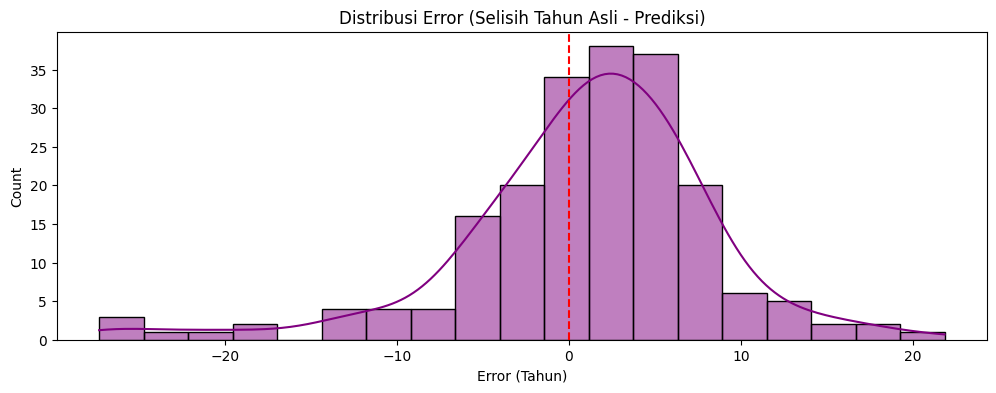

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. SIMPAN MODEL JUARA (DEEP LEARNING) ---
model_save_path = '/content/drive/MyDrive/midterm_Regresion/best_model_dl.keras'
model.save(model_save_path)
print(f"Model Deep Learning berhasil disimpan di: {model_save_path}")

# --- 2. VISUALISASI PREDIKSI VS ASLI ---
# Kita ambil sampel 200 data saja biar grafiknya gak "semrawut" (too crowded)
# y_test dan y_pred_dl ada ratusan ribu, kalau diplot semua nanti nge-lag
sample_size = 200
indices = np.random.choice(len(y_test), sample_size, replace=False)

y_test_sample = y_test.iloc[indices].values
y_pred_sample = y_pred_dl[indices]

plt.figure(figsize=(12, 6))

# Plot Scatter
plt.scatter(y_test_sample, y_pred_sample, alpha=0.7, color='blue', label='Prediksi Model')

# Garis Diagonal (Perfect Prediction)
# Kalau titiknya pas di garis merah, berarti tebakannya 100% benar
min_val = min(min(y_test_sample), min(y_pred_sample))
max_val = max(max(y_test_sample), max(y_pred_sample))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

plt.title('Deep Learning: Actual Year vs Predicted Year (200 Sampel Acak)')
plt.xlabel('Tahun Asli (Actual)')
plt.ylabel('Tahun Prediksi (Predicted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 3. ANALISA ERROR (RESIDUAL PLOT) ---
# Kalau errornya nyebar acak di sekitar 0, berarti bagus.
residuals = y_test_sample - y_pred_sample
plt.figure(figsize=(12, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Error (Selisih Tahun Asli - Prediksi)')
plt.xlabel('Error (Tahun)')
plt.axvline(0, color='red', linestyle='--') # Garis nol
plt.show()